training Perceptron


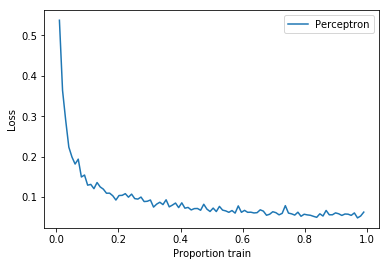

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
heldout = np.linspace(1,0,100)[1:99]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

classifiers = [
    ("Perceptron", Perceptron()),
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X)
            yy_.append(1-np.mean(y_pred == y))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Loss")
plt.show()